### Stock Data Exploration

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned data
all_stocks = pd.read_csv("../data/processed/all_stocks_clean.csv")
all_stocks["Date"] = pd.to_datetime(all_stocks["Date"])

print("Shape:", all_stocks.shape)
print("Tickers:", all_stocks["Ticker"].unique())
print(all_stocks.head())


Shape: (5020, 7)
Tickers: ['AAPL' 'MSFT' 'GOOG' 'AMZN']
        Date        Open        High         Low       Close     Volume Ticker
0 2020-09-16  112.086293  112.835283  108.983321  109.070862  154679000   AAPL
1 2020-09-17  106.726601  109.138937  105.744154  107.329681  178011000   AAPL
2 2020-09-18  107.388051  107.854952  103.195633  103.925171  287104900   AAPL
3 2020-09-21  101.687903  107.183759  100.287187  107.076759  195713800   AAPL
4 2020-09-22  109.605857  109.780947  106.181894  108.759590  183055400   AAPL


### 1. Plot  Price Trends

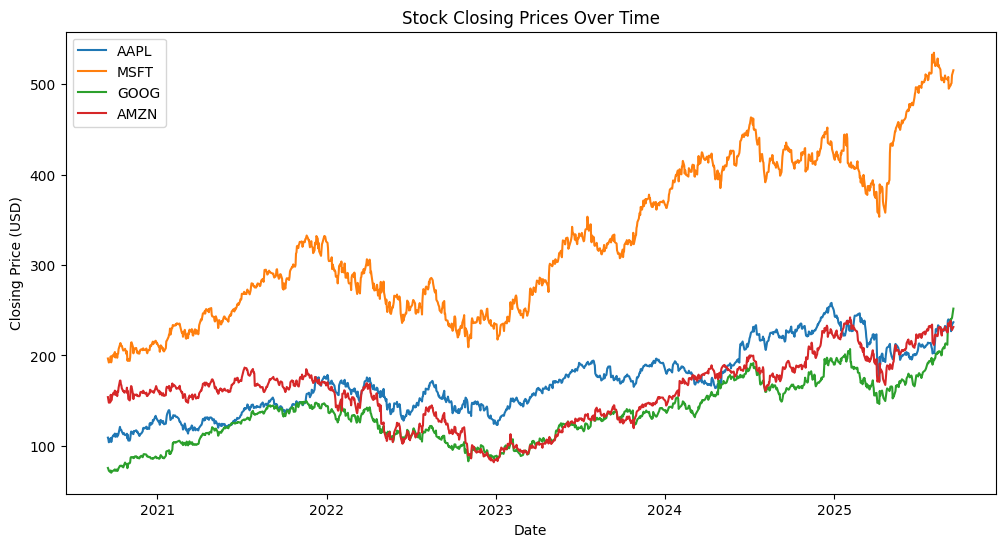

In [2]:
plt.figure(figsize=(12,6))
for ticker in all_stocks["Ticker"].unique():
    subset = all_stocks[all_stocks["Ticker"]==ticker]
    plt.plot(subset["Date"], subset["Close"], label=ticker)

plt.title("Stock Closing Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Closing Price (USD)")
plt.legend()
plt.show()

### 2. Daily Returns

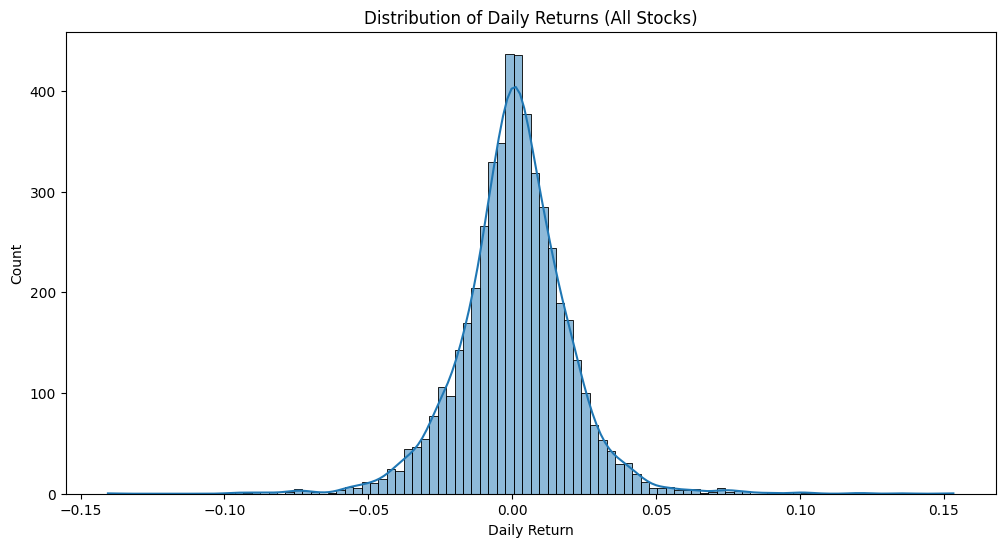

In [3]:
all_stocks["Return"] = all_stocks.groupby("Ticker")["Close"].pct_change()

plt.figure(figsize=(12,6))
sns.histplot(all_stocks["Return"].dropna(), bins=100, kde=True)
plt.title("Distribution of Daily Returns (All Stocks)")
plt.xlabel("Daily Return")
plt.show()

### 3. Volatility (Rolling Std Dev of Returns)

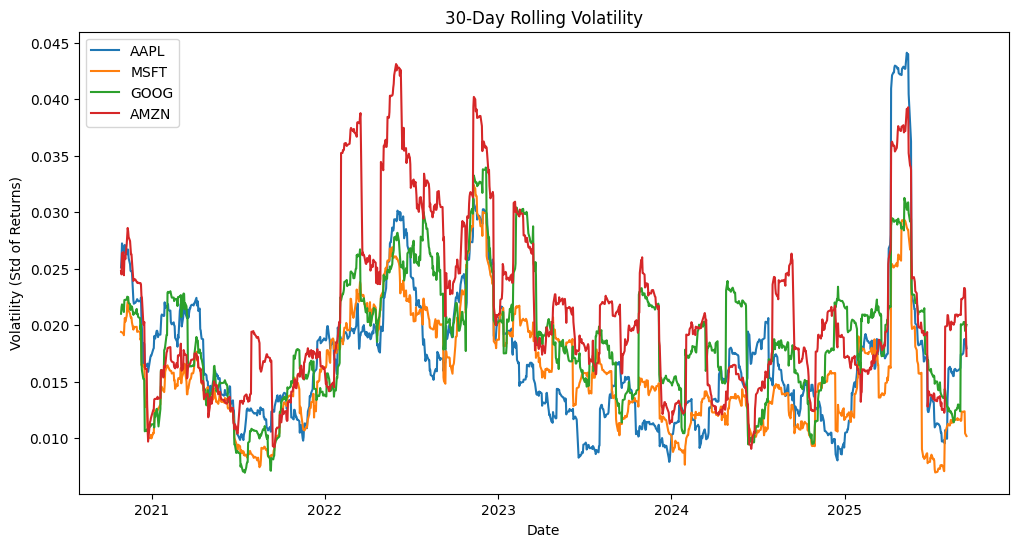

In [4]:
plt.figure(figsize=(12,6))
for ticker in all_stocks["Ticker"].unique():
    subset = all_stocks[all_stocks["Ticker"]==ticker].copy()
    subset["Volatility"] = subset["Return"].rolling(window=30).std()  # 30-day rolling volatility
    plt.plot(subset["Date"], subset["Volatility"], label=ticker)

plt.title("30-Day Rolling Volatility")
plt.xlabel("Date")
plt.ylabel("Volatility (Std of Returns)")
plt.legend()
plt.show()

### 4. Volume Trends

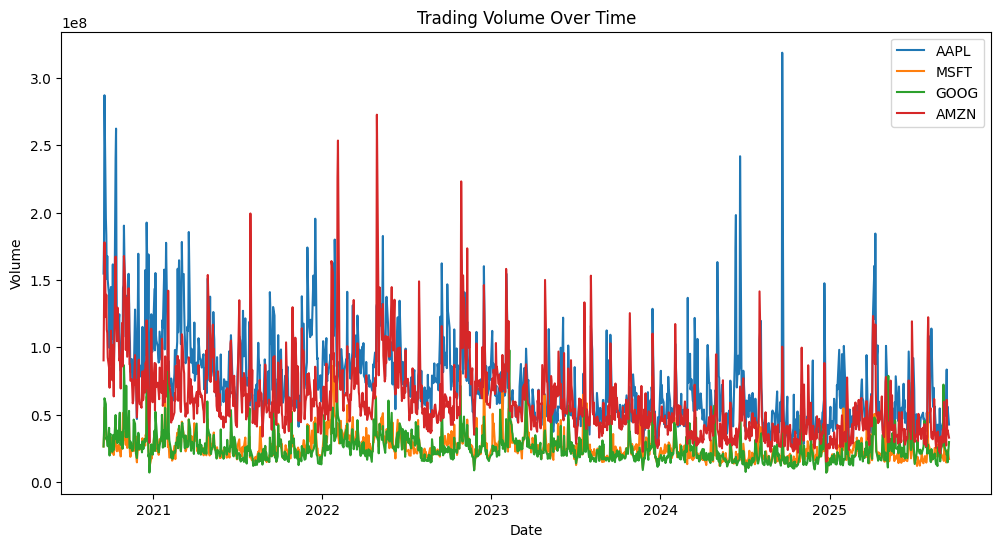

In [5]:
plt.figure(figsize=(12,6))
for ticker in all_stocks["Ticker"].unique():
    subset = all_stocks[all_stocks["Ticker"]==ticker]
    plt.plot(subset["Date"], subset["Volume"], label=ticker)

plt.title("Trading Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.legend()
plt.show()

### 5. Correlation of Returns

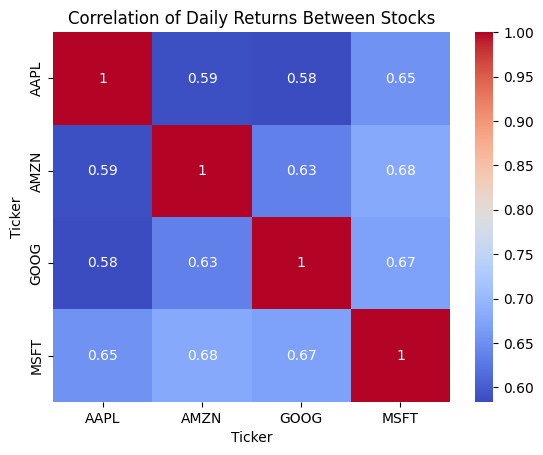

In [6]:
pivot_returns = all_stocks.pivot(index="Date", columns="Ticker", values="Return")
sns.heatmap(pivot_returns.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation of Daily Returns Between Stocks")
plt.show()

Closing Price Trends → See how AAPL, MSFT, GOOG, AMZN performed over time.

Daily Returns Distribution → Normal vs. fat tails (volatility clusters).

Volatility → Identify periods of high market stress (COVID dip, etc.).

Trading Volume Trends → Market activity spikes.

Return Correlations → How similar/different the stocks move.